## Intro to using StatsBomb data for match analysis

In [5]:
pip install statsbombpy

Defaulting to user installation because normal site-packages is not writeable
  Using cached statsbombpy-1.6.1-py3-none-any.whl (15 kB)
  Using cached nose2-0.12.0-py2.py3-none-any.whl (152 kB)
  Using cached inflect-6.0.2-py3-none-any.whl (34 kB)
  Using cached requests_cache-0.9.8-py3-none-any.whl (48 kB)
  Using cached pandas-1.5.3.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     |████████████████████████████████| 155 kB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 2.5 MB/s eta 0:00:01
  Using cached cattrs-22.2.0-py3-none-any.whl (35 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)
     |████████████████████████████████| 140 kB 3.9 MB/s eta 0:00:01
     |████████████████████████

### Import the event data 

In [4]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib --upgrade

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 2.4 MB/s eta 0:00:0000:0100:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 6.1 MB/s eta 0:00:00a 0:00:01
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.0/244.0 kB 4.7 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mplsoccer

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 630.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 2.6 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [23]:
from statsbombpy import sb
import pandas as pd
from pandas import json_normalize
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from matplotlib.colors import to_rgba
import matplotlib.style as style


style.use('fivethirtyeight')

# We'll only use a vertical pitch for this tutorial
from mplsoccer import VerticalPitch, Sbopen

# Get competitions
comp = sb.competitions()
comp.to_csv('competitions.csv', index=False)



In [2]:
# Get Matches from 2022 FIFA World Cup
df = sb.matches(competition_id=43, season_id=106)
df.to_csv('WC_Matches.csv', index=False)
df

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3869254,2022-12-06,21:00:00.000,International - FIFA World Cup,2022,Portugal,Switzerland,6,1,available,...,2023-01-14T15:08:46.172894,4,Round of 16,Lusail Stadium,César Arturo Ramos Palazuelos,Fernando Manuel Fernandes da Costa Santos,Murat Yakin,1.1.0,2,2
1,3869118,2022-12-04,21:00:00.000,International - FIFA World Cup,2022,England,Senegal,3,0,available,...,2022-12-13T21:39:52.223504,4,Round of 16,Al Bayt Stadium,Ivan Arcides Barton Cisneros,Gareth Southgate,Aliou Cissé,1.1.0,2,2
2,3869486,2022-12-10,17:00:00.000,International - FIFA World Cup,2022,Morocco,Portugal,1,0,available,...,2023-01-04T12:36:10.102347,5,Quarter-finals,Al Thumama Stadium,Facundo Tello Figueroa,Hoalid Regragui,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
3,3869685,2022-12-18,17:00:00.000,International - FIFA World Cup,2022,Argentina,France,3,3,available,...,2022-12-21T16:02:21.075183,7,Final,Lusail Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Didier Deschamps,1.1.0,2,2
4,3869684,2022-12-17,17:00:00.000,International - FIFA World Cup,2022,Croatia,Morocco,2,1,available,...,2022-12-18T21:30:47.341680,7,3rd Place Final,Sheikh Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Zlatko Dalić,Hoalid Regragui,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3857260,2022-11-30,21:00:00.000,International - FIFA World Cup,2022,Saudi Arabia,Mexico,1,2,available,...,2022-12-01T19:56:40.363859,3,Group Stage,Lusail Stadium,Michael Oliver,Hervé Renard,Gerardo Daniel Martino,1.1.0,2,2
60,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,...,2022-12-06T17:57:00.355945,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
61,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2022-12-21T16:01:27.541055,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2
62,3857255,2022-12-01,21:00:00.000,International - FIFA World Cup,2022,Japan,Spain,2,1,available,...,2022-12-21T15:58:42.193326,3,Group Stage,Sheikh Khalifa International Stadium,Victor Miguel de Freitas Gomes,Hajime Moriyasu,Luis Enrique Martínez García,1.1.0,2,2


In [25]:
# Find a match_id required
match = 3869118
match_events = sb.events(match_id=match)
match_events

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",England,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Senegal,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Senegal,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,England,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Senegal,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Kalvin Phillips,NaN,England,00:36:09.397,Substitution,NaN
3496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Fodé Ballo Touré,NaN,Senegal,00:38:54.020,Substitution,NaN
3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Senegal,00:00:04.078,Tactical Shift,NaN
3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Senegal,00:26:20.885,Tactical Shift,NaN


In [31]:
first_half = df.loc[df['period'] == 1] 
second_half = df.loc[df['period'] == 2] 
second_half.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,substitution_replacement_id,substitution_replacement_name,pass_cut_back,pass_miscommunication,foul_won_defensive,foul_committed_card_id,foul_committed_card_name,dribble_overrun,x,y
1744,a546254c-9edc-4557-9986-fea309a20ad6,1745,2,00:00:00.506,45,0,74,0.957364,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,39.9
1745,507454d8-d083-4cbe-8113-fdbb2e8acfbf,1746,2,00:00:01.464,45,1,74,NaN,42,Ball Receipt*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.5,41.8
1746,7631e5a7-2ee3-40ef-bdca-c97ce9abbbcb,1747,2,00:00:01.464,45,1,74,1.611884,43,Carry,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.5,41.8
1748,678f11b2-5335-4fd8-add3-608045cbfe99,1749,2,00:00:03.076,45,3,74,3.128298,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.2,36.9
1750,f6c86570-27d6-4c52-863d-f2828d6a5b2f,1751,2,00:00:06.204,45,6,74,NaN,42,Ball Receipt*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.1,3.6


In [32]:
pass_raw = first_half[df.type_name == 'Pass']
pass_raw.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,substitution_replacement_id,substitution_replacement_name,pass_cut_back,pass_miscommunication,foul_won_defensive,foul_committed_card_id,foul_committed_card_name,dribble_overrun,x,y
4,04e886ad-29bc-4b1b-9f6d-3654e94c7a68,5,1,00:00:00.828,0,0,2,1.350963,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,39.9
11,25d358c5-bc92-4b3a-a6d8-1338a1980236,12,1,00:00:05.092,0,5,2,0.871274,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.8,31.9
15,4252567c-1f87-45eb-ac9a-fb06f437467c,16,1,00:00:06.467,0,6,2,1.234622,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.4,38.7
18,0133f370-004d-47cb-b98d-991a19349e29,19,1,00:00:08.660,0,8,2,0.782355,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.2,49.5
20,53f39733-e427-4032-a160-a7a9280fc1ff,21,1,00:00:09.442,0,9,2,2.325874,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.3,51.5


In [33]:
pass_number_raw = pass_raw[['timestamp', 'player_name', 'pass_recipient_name']]
pass_number_raw.head()

,timestamp,player_name,pass_recipient_name
4,00:00:00.828,Iliman Ndiaye,Kalidou Koulibaly
11,00:00:05.092,Kalidou Koulibaly,Pathé Ismaël Ciss
15,00:00:06.467,Pathé Ismaël Ciss,Abdou Diallo
18,00:00:08.660,Abdou Diallo,Nampalys Mendy
20,00:00:09.442,Nampalys Mendy,Kalidou Koulibaly


In [34]:
pass_number_raw['pair'] = pass_number_raw.player_name + pass_number_raw.pass_recipient_name
pass_number_raw.head()

/var/folders/6h/6k3qgyf57t36w9tvygh1x2wc0000gn/T/ipykernel_16821/915231863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_number_raw['pair'] = pass_number_raw.player_name + pass_number_raw.pass_recipient_name


,timestamp,player_name,pass_recipient_name,pair
4,00:00:00.828,Iliman Ndiaye,Kalidou Koulibaly,Iliman NdiayeKalidou Koulibaly
11,00:00:05.092,Kalidou Koulibaly,Pathé Ismaël Ciss,Kalidou KoulibalyPathé Ismaël Ciss
15,00:00:06.467,Pathé Ismaël Ciss,Abdou Diallo,Pathé Ismaël CissAbdou Diallo
18,00:00:08.660,Abdou Diallo,Nampalys Mendy,Abdou DialloNampalys Mendy
20,00:00:09.442,Nampalys Mendy,Kalidou Koulibaly,Nampalys MendyKalidou Koulibaly


In [35]:
pass_count = pass_number_raw.groupby(['pair']).count().reset_index()
pass_count = pass_count[['pair', 'timestamp']]
pass_count.columns = ['pair', 'number_pass']
pass_count.head()

,pair,number_pass
0,Abdou DialloBoulaye Dia,1
1,Abdou DialloEdouard Mendy,2
2,Abdou DialloIsmail Jakobs,4
3,Abdou DialloIsmaïla Sarr,4
4,Abdou DialloKalidou Koulibaly,3


In [36]:
avg_loc_df = pass_raw[['team_name', 'player_name', 'location']]
avg_loc_df.head()

,team_name,player_name,location
4,Senegal,Iliman Ndiaye,"[61.0, 39.9]"
11,Senegal,Kalidou Koulibaly,"[41.8, 31.9]"
15,Senegal,Pathé Ismaël Ciss,"[53.4, 38.7]"
18,Senegal,Abdou Diallo,"[45.2, 49.5]"
20,Senegal,Nampalys Mendy,"[55.3, 51.5]"


In [37]:
import numpy as np

avg_loc_df['pos_x'] = avg_loc_df.location.apply(lambda x: x[0])
avg_loc_df['pos_y'] = avg_loc_df.location.apply(lambda x: x[1])
avg_loc_df = avg_loc_df.drop('location', axis=1)

avg_loc_df = avg_loc_df.groupby(['team_name','player_name']).agg({'pos_x': np.mean, 'pos_y': np.mean}).reset_index()

avg_loc_df.head()

/var/folders/6h/6k3qgyf57t36w9tvygh1x2wc0000gn/T/ipykernel_16821/2977196010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_loc_df['pos_x'] = avg_loc_df.location.apply(lambda x: x[0])
/var/folders/6h/6k3qgyf57t36w9tvygh1x2wc0000gn/T/ipykernel_16821/2977196010.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_loc_df['pos_y'] = avg_loc_df.location.apply(lambda x: x[1])


,team_name,player_name,pos_x,pos_y
0,England,Bukayo Saka,65.100000,18.600000
1,England,Declan Rice,54.764000,47.876000
2,England,Harry Kane,81.180000,47.606667
3,England,Harry Maguire,44.200000,63.695833
4,England,John Stones,37.454717,33.437736


In [38]:
pass_merge = pass_number_raw.merge(pass_count, on='pair')
pass_merge = pass_merge[['player_name', 'pass_recipient_name', 'number_pass']]
pass_merge = pass_merge.drop_duplicates()
pass_merge.head()

,player_name,pass_recipient_name,number_pass
0,Iliman Ndiaye,Kalidou Koulibaly,2
2,Kalidou Koulibaly,Pathé Ismaël Ciss,5
7,Pathé Ismaël Ciss,Abdou Diallo,4
11,Abdou Diallo,Nampalys Mendy,5
16,Nampalys Mendy,Kalidou Koulibaly,5


In [39]:
avg_loc_df = avg_loc_df[['player_name', 'pos_x', 'pos_y']]

pass_cleaned = pass_merge.merge(avg_loc_df, on='player_name')
pass_cleaned.rename({'pos_x': 'pos_x_start', 'pos_y': 'pos_y_start'}, axis='columns', inplace=True)

pass_cleaned = pass_cleaned.merge(avg_loc_df, left_on='pass_recipient_name', right_on='player_name', suffixes=['', '_end'])
pass_cleaned.rename({'pos_x': 'pos_x_end', 'pos_y': 'pos_y_end'}, axis='columns', inplace=True)

pass_cleaned = pass_cleaned.drop(['player_name_end'], axis=1)
pass_cleaned.head()

,player_name,pass_recipient_name,number_pass,pos_x_start,pos_y_start,pos_x_end,pos_y_end
0,Iliman Ndiaye,Kalidou Koulibaly,2,73.622222,18.833333,34.234615,22.892308
1,Pathé Ismaël Ciss,Kalidou Koulibaly,2,53.369565,24.873913,34.234615,22.892308
2,Abdou Diallo,Kalidou Koulibaly,3,43.365217,61.300000,34.234615,22.892308
3,Nampalys Mendy,Kalidou Koulibaly,5,60.656522,44.573913,34.234615,22.892308
4,Youssouf Sabaly,Kalidou Koulibaly,5,52.141176,6.405882,34.234615,22.892308


In [40]:
eng_player_df = first_half[first_half.team_name == 'England'].groupby('player_name').agg({'minute': [min, max]}).reset_index()
eng_player_df = pd.concat([eng_player_df['player_name'], eng_player_df['minute']], axis=1)
eng_player_df['minutes_played'] = eng_player_df['max'] - eng_player_df['min']
eng_player_df = eng_player_df.sort_values('minutes_played', ascending=False)
eng_player_df

,player_name,min,max,minutes_played
2,Harry Kane,0,47,47
7,Jude Bellingham,0,47,47
8,Kyle Walker,0,47,47
10,Philip Foden,0,47,47
3,Harry Maguire,0,45,45
5,Jordan Brian Henderson,0,45,45
6,Jordan Pickford,0,45,45
9,Luke Shaw,0,45,45
1,Declan Rice,0,44,44
4,John Stones,1,44,43


In [41]:
eng_player_names = eng_player_df.player_name[:11].tolist()

pass_eng = pass_cleaned[pass_cleaned.player_name.isin(eng_player_names)]
pass_eng = pass_eng[pass_eng.pass_recipient_name.isin(eng_player_names)]

print(pass_eng.shape)
pass_eng.head()

(85, 7)


,player_name,pass_recipient_name,number_pass,pos_x_start,pos_y_start,pos_x_end,pos_y_end
64,Philip Foden,Declan Rice,1,85.513043,65.891304,54.764,47.876
65,Luke Shaw,Declan Rice,4,69.494286,75.102857,54.764,47.876
66,Harry Maguire,Declan Rice,1,44.200000,63.695833,54.764,47.876
67,John Stones,Declan Rice,7,37.454717,33.437736,54.764,47.876
68,Kyle Walker,Declan Rice,2,49.592105,16.050000,54.764,47.876


In [88]:
pass_eng['width'] = pass_eng['number_pass'] / pass_eng['number_pass'].max()
pass_eng.head()

,player_name,pass_recipient_name,number_pass,pos_x_start,pos_y_start,pos_x_end,pos_y_end,width
64,Philip Foden,Declan Rice,1,85.513043,65.891304,54.764,47.876,0.0625
65,Luke Shaw,Declan Rice,4,69.494286,75.102857,54.764,47.876,0.2500
66,Harry Maguire,Declan Rice,1,44.200000,63.695833,54.764,47.876,0.0625
67,John Stones,Declan Rice,7,37.454717,33.437736,54.764,47.876,0.4375
68,Kyle Walker,Declan Rice,2,49.592105,16.050000,54.764,47.876,0.1250


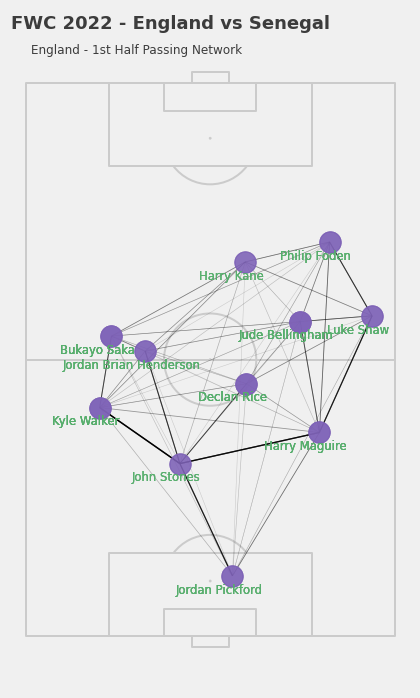

In [98]:
MIN_TRANSPARENCY = 0.1
color = np.array(to_rgba('black'))
color = np.tile(color, (len(pass_eng), 1))
c_transparency = pass_eng.number_pass / pass_eng.number_pass.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

pitch = VerticalPitch(pitch_type='statsbomb', 
    half = False,
    axis = True, 
    # label = True, 
    # tick = True,
    goal_type='box')
    
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False, 
                      title_space=0, grid_height=0.82, endnote_height=0.05)

# fig.set_facecolor("#FFFFFF")

pass_lines = pitch.lines(pass_eng.pos_x_start, pass_eng.pos_y_start,
                         pass_eng.pos_x_end, pass_eng.pos_y_end, 
                         lw=pass_eng.width+0.5,
                         color=color, zorder=1, ax=axs['pitch'])

pass_nodes = pitch.scatter(pass_eng.pos_x_start, pass_eng.pos_y_start, s=450,
                           color= '#7f63b8', linewidth=1, alpha=0.3, ax=axs['pitch'])

for index, row in pass_eng.iterrows():
    pitch.annotate(row.player_name, xy=(row.pos_x_start-3, row.pos_y_start-3), c='#56ae6c', va='center',
                   ha='center', size='small', weight = 'light', family='sans-serif', ax=axs['pitch'],stretch= 'ultra-condensed',style="normal" ,alpha=0.5)
    
# endnote /title
axs['endnote'].text(1, 0.5, '[YOUR NAME HERE]', color='#c7d5cc',
                    va='center', ha='right', fontsize=15)

# axs['endnote'].text(0.5, 0.9, 'Attacking Direction', va='center', ha='center', color='#c7d5cc', fontsize=12)
# axs['endnote'].arrow(0.4, 0.6, 0.2, 0, head_width=0.25, head_length=0.025, ec='w', fc='w')
# axs['endnote'].set_xlim(0, 1)
# axs['endnote'].set_ylim(0, 1)

axs['title'].text(0.4, 0.7, 'FWC 2022 - England vs Senegal ', weight = 'bold', alpha = .75,
                  va='center', ha='center', fontsize=18)
axs['title'].text(0.3, 0.25, 'England - 1st Half Passing Network',
                  va='center', ha='center', alpha = .75, fontsize=12)
plt.savefig('Passing Networks.png', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'first_half' is not defined